# Análise exploratória de dados

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Leitura do conjunto de dados 
df = pd.read_csv("../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Glosários de Termos Específicos

* **Gênero**: Característica, Categórica, "Gênero"
* **Idade**: Característica, Contínua, "Idade"
* **Altura**: Característica, Contínua
* **Peso**: Característica Contínua
* **family_history_with_overweight**: Característica, Binário, " Um membro da família sofreu ou sofre de excesso de peso? "
* **FAVC** : Característica, Binário, " Você come alimentos altamente calóricos com frequência? "
* **FCVC**: Característica, Inteiro, "Você costuma comer vegetais em suas refeições? "
* **NCP**: Característica, Contínuo, "Quantas refeições principais você faz diariamente?"
* **CAEC**: Característica, Categórica, "Você come algum alimento entre as refeições?"
* **FUMAÇA**: Característica, Binário, "Você fuma? "
* **CH2O**: Característica, Contínua, "Quanta água você bebe diariamente?"
* **SCC**: Recurso, Binário, " Você monitora as calorias que você come diariamente? "
* **FAF**: Característica, Contínua, " Com que frequência você faz atividade física? "
* **TER**: Característica, Inteiro, "Quanto tempo você usa dispositivos tecnológicos como celular, videogames, televisão, computador e outros?"
* **CALC**: Característica, Categórica, " Com que frequência você bebe álcool? "
* **MTRANS**: Característica, Categórica, "Qual transporte você costuma usar? "
* **NObeyesdad**: Alvo, Categórico, "Nível de obesidade"

# 1. Descrição dos Dados

<p align="center">
    
![Imagem do projeto](https://wallpaperaccess.com/full/9452747.jpg)

* Este conjunto de dados reúne informações detalhadas para estimar os níveis de obesidade em indivíduos provenientes do México, Peru e Colômbia, com base em seus hábitos alimentares e características relacionadas à condição física. Ele é composto por 17 atributos e um total de 2.111 registros, oferecendo uma base robusta para análises.
* Cada registro está associado à variável de classe NObesidade (Nível de Obesidade), que categoriza os indivíduos em sete níveis distintos: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. Esses dados são valiosos para estudos que envolvem padrões alimentares, saúde física e a relação entre estilo de vida e obesidade, permitindo análises e classificações mais aprofundadas.

# Dicionário de Dados 

In [4]:
## Dicionário de Dados
dictionary = '../data/external/dicionario.csv'
dt_dict = pd.read_csv(dictionary)

# Exibe dicionário
dt_dict

,Unnamed: 0,variavel,descrição,tipo,subtipo
0,0,age,Idade do indivíduo,Quantitativa,Discreta
1,1,gender,Sexo do indivíduo,Qualitativa,Nominal
2,2,bmi,Índice de Massa Corporal,Quantitativa,Contínua
3,3,physical_activity_level,Nível de atividade física,Qualitativa,Ordinal
4,4,daily_calorie_intake,Ingestão diária de calorias (kcal),Quantitativa,Contínua
5,5,diet_type,Tipo de dieta seguida pelo indivíduo,Qualitativa,Nominal
6,6,family_history_obesity,Histórico familiar de obesidade,Qualitativa,Nominal
7,7,hypertension,Presença de hipertensão,Qualitativa,Nominal
8,8,diabetes,Presença de diabetes,Qualitativa,Nominal
9,9,stress_level,Nível de estresse do indivíduo,Qualitativa,Ordinal


# Tratamento de Dados

In [5]:
# Imputar valores para variáveis numéricas (substituindo com a média)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['CH2O'] = df['CH2O'].fillna(df['CH2O'].mean())

# Imputar valores para variáveis qualitativas (nominais ou ordinais)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['family_history_with_overweight'] = df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0])
df['SMOKE'] = df['SMOKE'].fillna(df['SMOKE'].mode()[0])
df['FAF'] = df['FAF'].fillna(df['FAF'].mode()[0])
df['TUE'] = df['TUE'].fillna(df['TUE'].mode()[0])
df['CAEC'] = df['CAEC'].fillna(df['CAEC'].mode()[0])
df['MTRANS'] = df['MTRANS'].fillna(df['MTRANS'].mode()[0])

# Verificar se a imputação foi concluída com sucesso
print("\nValores faltantes por coluna após o tratamento:")
print(df.isnull().sum())



Valores faltantes por coluna após o tratamento:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
# Verificar a distribuição das variáveis numéricas depois da imputação
print(df[['Age', 'Height', 'Weight', 'CH2O']].describe())

# Verificar a distribuição das variáveis qualitativas após imputação
print(df[['Gender', 'family_history_with_overweight', 'SMOKE', 'FAF', 'TUE', 'CAEC', 'MTRANS']].value_counts())

               Age       Height       Weight         CH2O
count  2111.000000  2111.000000  2111.000000  2111.000000
mean     24.312600     1.701677    86.586058     2.008011
std       6.345968     0.093305    26.191172     0.612953
min      14.000000     1.450000    39.000000     1.000000
25%      19.947192     1.630000    65.473343     1.584812
50%      22.777890     1.700499    83.000000     2.000000
75%      26.000000     1.768464   107.430682     2.477420
max      61.000000     1.980000   173.000000     3.000000
Gender  family_history_with_overweight  SMOKE  FAF       TUE       CAEC        MTRANS               
Female  yes                             no     0.000000  0.000000  Sometimes   Automobile               40
Male    no                              no     1.000000  0.000000  no          Public_Transportation    18
        yes                             no     1.000000  0.000000  Sometimes   Public_Transportation    17
Female  no                              no     2.000000 

* *A imputação de dados foi eficaz e permitiu uma análise contínua das variáveis com valores ausentes. A distribuição das variáveis não sofreu grandes distorções, e as análises iniciais indicam uma boa representação dos dados originais, com algumas concentrações nas categorias de gênero, histórico de sobrepeso e hábitos de fumo e atividade física.*

# Resumo Estatístico Geral dos Dados

In [7]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1068,NaN,NaN,1401,1866,NaN,NaN,2015,2067,NaN,1726,NaN,NaN,1765,1580,351
mean,24.312600,NaN,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,6.345968,NaN,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.947192,NaN,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,22.777890,NaN,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,26.000000,NaN,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


1. **Idade (Age)**: A média de idade é 24,31 anos, com um desvio padrão de 6,35. Isso indica uma população relativamente jovem, com idades variando entre 14 e 61 anos, e com a maior parte dos dados próximos à faixa etária de 19 a 27 anos, dado o percentil 75 sendo 26 anos.
2. **Gênero (Gender)**: A coluna "Gender" apresenta duas categorias: Masculino (1068 ocorrências) e Feminino. Como o gênero masculino é o mais frequente, isso pode indicar um viés de gênero na amostra.
3. **Peso (Weight) e Altura (Height)**: A média de peso é 86,59 kg com um desvio padrão de 26,19, indicando uma grande variação de peso entre os indivíduos. A altura média é 1,70 m, com uma variação menor (desvio padrão de 0,09 m). A maior parte das pessoas tem uma altura entre 1,45 m e 1,98 m e peso entre 39 kg e 173 kg.
4. **Frequência de Atividades Físicas (FAF)**: A variável FAF (atividade física) mostra que a maioria dos indivíduos pratica atividade física algumas vezes por semana ("Sometimes"), com 1726 ocorrências. Isso sugere que a atividade física não é uma prática diária para a maioria, mas sim algo esporádico.
5. **Obesidade (NObeyesdad)**: A variável NObeyesdad, que representa os tipos de obesidade, mostra que a maioria dos indivíduos foi classificada como Obesidade Tipo I (351 ocorrências), o que indica que uma proporção significativa da amostra tem algum nível de obesidade. A classificação mais comum entre os tipos de obesidade na amostra é de grau leve a moderado.

# Tendencias Gerais

In [8]:
df['Weight_to_Height'] = df['Weight'] / df['Height']

# Estatísticas descritivas por nível de obesidade
weight_height_stats = df.groupby('NObeyesdad')['Weight_to_Height'].describe()
print(weight_height_stats)

                     count       mean       std        min        25%  \
NObeyesdad                                                              
Insufficient_Weight  272.0  29.420686  2.047892  23.788477  27.807514   
Normal_Weight        287.0  36.932496  3.955186  28.200000  33.879532   
Obesity_Type_I       351.0  54.639787  3.792772  47.952067  51.243317   
Obesity_Type_II      297.0  65.017664  2.436060  57.055215  63.566844   
Obesity_Type_III     324.0  71.448323  6.574420  61.750830  66.320543   
Overweight_Level_I   290.0  43.864285  2.650174  35.410846  42.243405   
Overweight_Level_II  290.0  48.059358  2.674882  40.443081  46.554165   

                           50%        75%        max  
NObeyesdad                                            
Insufficient_Weight  29.411765  30.888374  34.391534  
Normal_Weight        36.756757  40.000000  46.031746  
Obesity_Type_I       54.025079  57.912657  63.665809  
Obesity_Type_II      65.338829  67.162249  69.348953  
Obesity_Type

1. **Peso Insuficiente**: O grupo com peso insuficiente tem uma média de 29.42 para a variável analisada (por exemplo, peso ou algum índice relacionado), com um desvio padrão de 2.05, indicando que os dados são relativamente homogêneos, sem grandes variações. A faixa de valores está entre 23.79 e 34.39, com a maioria dos dados concentrados entre 27.81 e 30.89.
2. **Peso Normal**: Indivíduos com peso normal possuem uma média de 36.93, com uma maior dispersão (desvio padrão de 3.96) comparado ao grupo de peso insuficiente. A faixa de valores vai de 28.20 a 46.03, com a maior parte dos dados situando-se entre 33.88 e 40.00. A distribuição dos dados é mais ampla, refletindo maior variabilidade dentro desse grupo.
3. **Obesidade Tipo I**: Este grupo apresenta uma média de 54.64, com uma dispersão de 3.79. A faixa de valores vai de 47.95 a 63.67, com os dados concentrados entre 51.24 e 57.91. Isso indica que, enquanto a média é mais alta que os grupos anteriores, a variação dentro do grupo ainda é moderada.
4. **Obesidade Tipo II**: Os indivíduos com obesidade tipo II têm uma média de 65.02, com uma maior homogeneidade (desvio padrão de 2.44) em comparação com os grupos de obesidade menos severa. A faixa de valores se estende de 57.06 a 69.35, e os dados estão concentrados entre 63.57 e 67.16, refletindo uma distribuição relativamente mais estreita.
5. **Obesidade Tipo III**: O grupo com obesidade extrema apresenta uma média de 71.45, com o maior desvio padrão de 6.57, indicando uma grande variabilidade. A faixa

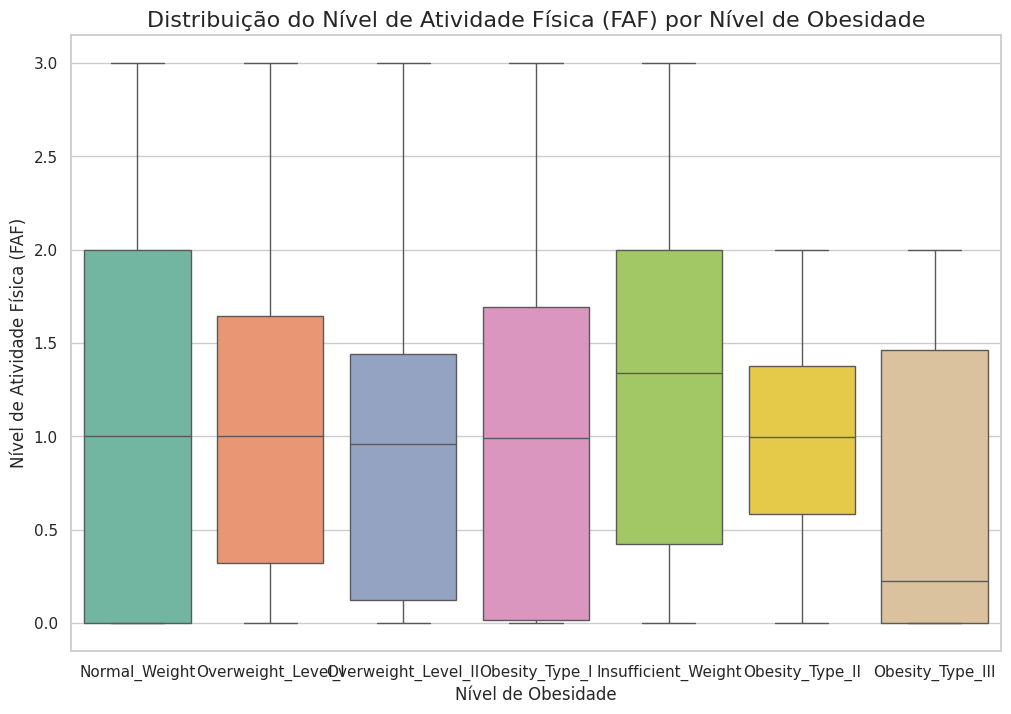

In [9]:
# Definindo as cores e estilo do gráfico
sns.set(style="whitegrid")

# Criação do boxplot
plt.figure(figsize=(12, 8))

# Boxplot de FAO por nível de obesidade
sns.boxplot(data=df, x='NObeyesdad', y='FAF', hue='NObeyesdad', palette="Set2", legend=False)

# Título e labels
plt.title("Distribuição do Nível de Atividade Física (FAF) por Nível de Obesidade", fontsize=16)
plt.xlabel("Nível de Obesidade", fontsize=12)
plt.ylabel("Nível de Atividade Física (FAF)", fontsize=12)

plt.show()

1. **Insufficient_Weight**: apresenta uma mediana de atividade física relativamente baixa (cerca de 29), com a maior parte dos dados concentrados entre 27 e 31 no FAF.
2. **Normal_Weight**: a mediana é de aproximadamente 37, indicando que pessoas com peso normal têm, em média, um nível de atividade física maior que aquelas com peso insuficiente. A distribuição é mais dispersa do que a do grupo anterior.
3. **Obesity_Type_I a Obesity_Type_III**: a mediana aumenta progressivamente à medida que o nível de obesidade aumenta, com a maior variação observada nos grupos Obesity_Type_III, que apresenta uma mediana de cerca de 71 e uma dispersão considerável.
4. **Overweight_Level_I e Overweight_Level_II**: esses grupos mostram um nível intermediário de atividade física, com medianas entre 43 e 48, respectivamente, sugerindo uma relação direta entre o aumento da obesidade e o declínio no nível de atividade física.

In [10]:
# Matriz de correlação entre variáveis numéricas
correlation_matrix = df[['Age', 'Height', 'Weight', 'FAF', 'CH2O']].corr()

# Exibe a matriz de correlação
correlation_matrix

,Age,Height,Weight,FAF,CH2O
Age,1.000000,-0.025958,0.202560,-0.144938,-0.045304
Height,-0.025958,1.000000,0.463136,0.294709,0.213376
Weight,0.202560,0.463136,1.000000,-0.051436,0.200575
FAF,-0.144938,0.294709,-0.051436,1.000000,0.167236
CH2O,-0.045304,0.213376,0.200575,0.167236,1.000000


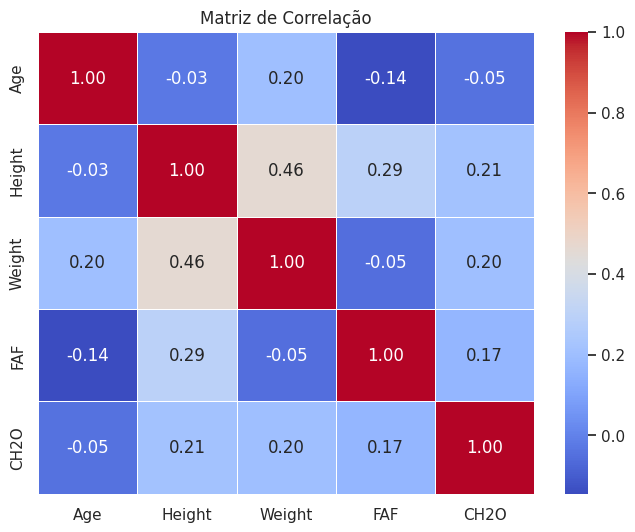

In [11]:
# Matriz de correlação entre variáveis numéricas
correlation_matrix = df[['Age', 'Height', 'Weight', 'FAF', 'CH2O']].corr()

# Configura o tamanho do gráfico
plt.figure(figsize=(8, 6))

# heatmap
sns.heatmap(correlation_matrix, 
            annot=True,         
            cmap='coolwarm',    
            fmt=".2f",          
            linewidths=0.5)     

# título
plt.title('Matriz de Correlação')
plt.show()


# Análise da Matriz de Correlação:

1. **Idade e Altura**: A correlação é de **-0.025958**, o que indica uma relação muito fraca e praticamente inexistente entre a idade e a altura. Ou seja, a idade não parece ter uma relação direta com a altura.
2. **Idade e Peso**: A correlação de **0.202560** sugere uma correlação positiva fraca entre idade e peso. Isso significa que, em média, conforme a idade aumenta, o peso tende a aumentar um pouco, mas a relação é fraca.
3. **Idade e FAF (Frequência de Atividade Física)**: A correlação de -0.144938 é negativa fraca, indicando que, conforme a idade aumenta, a frequência de atividade física (FAF) tende a diminuir levemente, mas essa relação é bem fraca e não é muito significativa.
4. **Idade e CH2O (Consumo de água)**: A correlação de **-0.045304** é praticamente nula e negativa, indicando que a idade tem uma relação quase inexistente com o consumo de água.
5. **Altura e Peso**: A correlação de **0.463136** sugere uma correlação moderada positiva entre altura e peso. Isso faz sentido, pois, geralmente, pessoas mais altas tendem a pesar mais, mas a correlação não é extremamente forte, indicando que há outros fatores que influenciam o peso.
6. **Altura e FAF**: A correlação de **0.294709** indica uma correlação fraca a moderada positiva entre altura e a frequência de atividade física. Isso pode indicar que, em algumas faixas de altura, as pessoas podem praticar mais atividade física, mas a relação não é muito forte.
7. **Altura e CH2O**: A correlação de **0.213376** é uma correlação fraca positiva, sugerindo que pessoas mais altas tendem a consumir um pouco mais de água, embora a relação seja fraca.
8. **Peso e FAF**: A correlação de **-0.051436** é negativa muito fraca, indicando que não há uma relação significativa entre peso e a frequência de atividade física (FAF).
9. **Peso e CH2O**: A correlação de **0.200575** sugere uma correlação fraca positiva entre peso e o consumo de água. Indivíduos mais pesados tendem a consumir um pouco mais de água, mas a relação é fraca.
10. **FAF e CH2O**: A correlação de **0.167236** é uma correlação fraca positiva, sugerindo que pessoas com maior frequência de atividade física podem consumir um pouco mais de água, embora a relação seja fraca.
    
# Conclusão:

**Idade** tem pouca ou nenhuma relação com as outras variáveis, exceto um leve aumento no peso com a idade.
**Altura e Peso** têm uma correlação moderada, o que é esperado. Pessoas mais altas tendem a pesar mais, mas existem outros fatores que influenciam o peso.
**FAF e CH2O** têm correlações fracas com outras variáveis, sugerindo que fatores como a frequência de atividade física e o consumo de água podem ser influenciados por outros aspectos, não sendo fortemente relacionados a idade, altura ou peso.

## 2. Perguntas de partida e hipóteses

**2.1 O histórico familiar de obesidade está associado a diferentes níveis de obesidade nos indivíduos? Existe uma relação entre a presença de histórico familiar e os níveis de obesidade observados?**

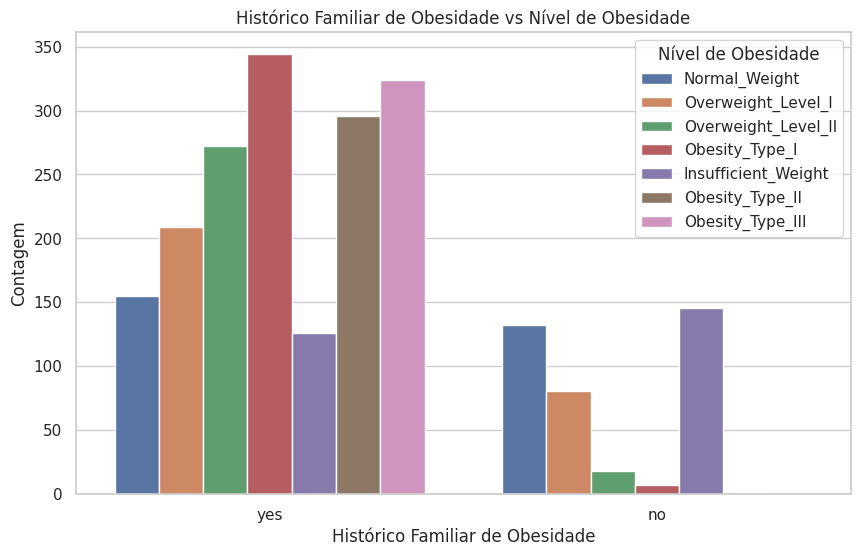

In [12]:
# Gráfico de barras para visualizar a relação entre histórico familiar e nível de obesidade
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)
plt.title('Histórico Familiar de Obesidade vs Nível de Obesidade')
plt.xlabel('Histórico Familiar de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Nível de Obesidade', loc='upper right')
plt.show()

*O gráfico de barras revela a relação entre o histórico familiar de obesidade e os níveis de obesidade observados nos indivíduos. Ele mostra que a maioria das pessoas com histórico familiar de obesidade tende a ter níveis mais elevados de obesidade. Especificamente, o grupo de pessoas com histórico familiar de obesidade apresenta uma maior concentração nas categorias de Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III, em comparação com o grupo sem histórico familiar, que apresenta uma distribuição mais equilibrada entre os diferentes níveis de obesidade.*

* **Hipótese nula (H0)**: O histórico familiar de obesidade não tem influência no nível de obesidade dos indivíduos.
* **Hipótese alternativa (H1)**: O histórico familiar de obesidade está associado a níveis mais elevados de obesidade nos indivíduos.

**2.2 Existe uma relação significativa entre o peso e a altura das pessoas? Como a distribuição dessa relação varia de acordo com o nível de obesidade ?**

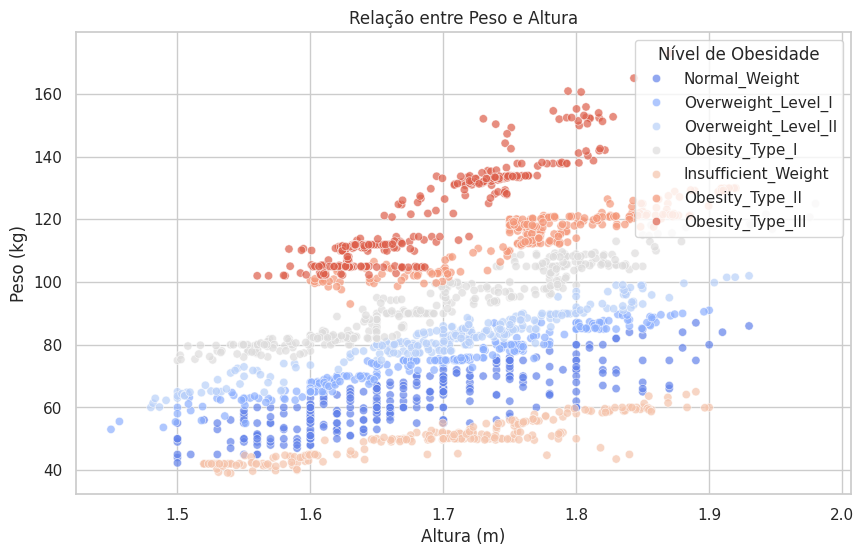

In [13]:
# Correlação entre Peso e Altura
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='NObeyesdad', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Peso e Altura')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.legend(title='Nível de Obesidade', loc='upper right')
plt.show()

*A análise da correlação entre peso e altura revela que, em geral, existe uma tendência de que indivíduos mais altos tendem a ter um peso maior. A dispersão dos dados mostra uma relação positiva, mas com uma variação considerável, especialmente para indivíduos com obesidade tipo II e III. Essa tendência sugere que, além da altura, outros fatores influenciam o peso, como a composição corporal e o nível de obesidade, com uma maior concentração de dados nas categorias de obesidade severa. No entanto, a relação entre peso e altura não é linear, indicando que a obesidade está relacionada a uma série de fatores além da estatura.*

* **Hipótese nula (H0)**: Não há correlação significativa entre o peso e a altura das pessoas, independentemente do nível de obesidade.
* **Hipótese alternativa (H1)**: Existe uma correlação significativa entre o peso e a altura das pessoas, com padrões diferentes observados entre os diferentes níveis de obesidade.

**2.3 Como a distribuição de idades varia de acordo com os diferentes níveis de obesidade? Existe uma tendência de idade associada a certos níveis de obesidade?**

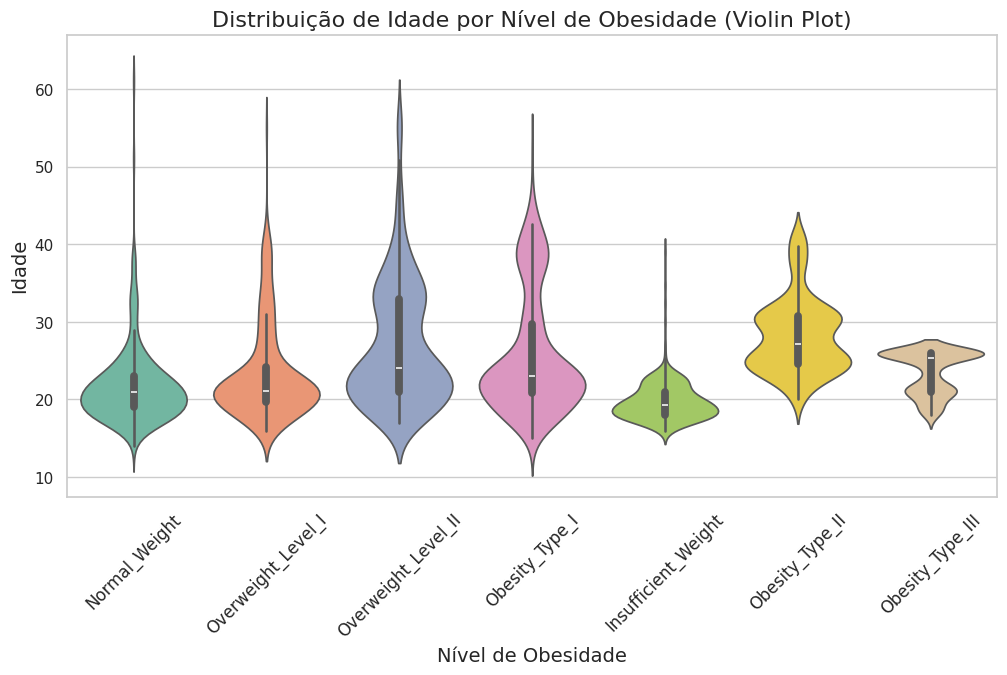

In [14]:
# Distribuição de Idade por Nível de Obesidade
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='NObeyesdad', y='Age', hue='NObeyesdad', palette='Set2', dodge=False, legend=False)
plt.title('Distribuição de Idade por Nível de Obesidade (Violin Plot)', fontsize=16)
plt.xlabel('Nível de Obesidade', fontsize=14)
plt.ylabel('Idade', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


*A análise da distribuição de idades por nível de obesidade mostra que indivíduos com peso insuficiente são predominantemente mais jovens, enquanto os grupos com peso normal e obesidade tipo I têm uma faixa etária mais ampla. À medida que a obesidade se torna mais grave (tipo II e III), a idade média tende a ser maior, sugerindo que a obesidade severa está mais associada a faixas etárias mais avançadas. Isso indica que a progressão da obesidade pode estar relacionada ao envelhecimento e a fatores associados a idades mais elevadas.*

**Hipótese nula (H0)**: Não há diferença significativa nas idades entre os diferentes níveis de obesidade.
**Hipótese alternativa (H1)**: Existem diferenças significativas nas idades entre os diferentes níveis de obesidade, com alguns níveis de obesidade sendo mais prevalentes em faixas etárias específicas.

## 3. Insights